<a href="https://colab.research.google.com/github/Hansol03/PyTorch-Wikidocs-/blob/main/Pytorch%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9E%85%EB%AC%B8_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**06.인공 신경망**

In [ ]:
def AND_gate(x1, x2): 
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1 

In [ ]:
AND_gate(0,0), AND_gate(0,1), AND_gate(1,0), AND_gate(1,1)

(0, 0, 0, 1)

In [ ]:
def NAND_gate(x1, x2): 
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b 
    if result <= 0:
        return 0 
    else: 
        return 1 

In [ ]:
NAND_gate(0,1), NAND_gate(0,1), NAND_gate(1,0), NAND_gate(1,1) 

(1, 1, 1, 0)

In [ ]:
def OR_gate(x1, x2): 
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b 
    if result <= 0:
        return 0 
    else:
        return 1 

In [ ]:
OR_gate(0,0), OR_gate(0,1), OR_gate(1,0), OR_gate(1,1)

(0, 1, 1, 1)

####**03.XOR문제 - 단층 퍼셉트론 구현하기**

In [ ]:
import torch 
import torch.nn as nn 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777) 
if device == 'cuda':
    torch.cuda.manual_seed_all(777) 

In [ ]:
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device) 
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device) 

In [ ]:
linear = nn.Linear(2,1, bias=True) 
sigmoid = nn.Sigmoid() 
model = nn.Sequential(linear, sigmoid).to(device) 

In [ ]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1) 

In [ ]:
# 10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지
for step in range(10001): 
    optimizer.zero_grad() 
    hypothesis = model(X) 

    # 비용 함수 
    cost = criterion(hypothesis, Y) 
    cost.backward() 
    optimizer.step() 

    if step % 100 ==0:  # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [ ]:
with torch.no_grad(): 
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean() 
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy()) 
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy()) 
    print('정확도(Accuracy): ', accuracy.item()) 

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [ ]:
# 05.XOR문제-다층 퍼셉트론 구하기
import torch
import torch.nn as nn 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

# for reproducivility 
torch.manual_seed(777) 
if device == 'cuda': 
    torch.cuda.manual_seed_all(777) 

In [ ]:
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device) 
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device) 

In [ ]:
model = nn. Sequential(
          nn.Linear(2,10, bias=True), # input_layer =2 , hiddne_layer1 = 10
          nn.Sigmoid(), 
          nn.Linear(10, 10, bias=True), # hiddne_layer1 = 10, hidden_layer2 = 10 
          nn.Sigmoid(), 
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10 
          nn.Sigmoid(), 
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer=1 
          nn.Sigmoid()
          ).to(device) 

In [ ]:
criterion = torch.nn.BCELoss().to(device) 
optimizer = torch.optim.SGD(model.parameters(), lr=1) # modified learning rate from 01. to 1 

In [ ]:
for epoch in range(10001): 
    optimizer.zero_grad() 
    # forward 연산 
    hypothesis = model(X) 

    # 비용 함수
    cost = criterion(hypothesis, Y) 
    cost.backward() 
    optimizer.step() 

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())  

0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931513547897339
400 0.6931492686271667
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931415796279907
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931362152099609
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825114250183
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930611729621887
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928650140762329
4200

In [ ]:
with torch.no_grad(): 
    hypothesis = model(X) 
    predicted = (hypothesis > 0.5).float() 
    accuracy = (predicted == Y).float().mean() 
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy()) 
    print('모델의 예측값(predicted):' , predicted.detach().cpu().numpy()) 
    print('실제값(Y): ', Y.cpu().numpy()) 
    print('정확도도(accuracy): ', accuracy.item()) 

모델의 출력값(Hypothesis):  [[1.1169227e-04]
 [9.9982882e-01]
 [9.9984241e-01]
 [1.8534942e-04]]
모델의 예측값(predicted): [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도도(accuracy):  1.0


####**06.비선형 활성화 함수(Activation Function)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

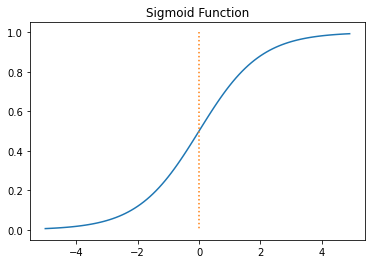

In [ ]:
# 2. Sigmoid 함수와 기울기 소멸 
# 시그모이드 함수 그래프를 그리는 코드 
def sigmoid(x): 
    return 1/(1+np.exp(-x)) 
x = np.arange(-5.0, 5.0, 0.1) 
y = sigmoid(x) 

plt.plot(x, y) 
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가 
plt.title('Sigmoid Function') 
plt.show()

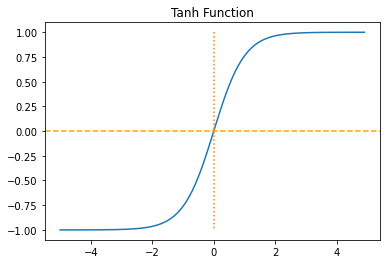

In [ ]:
# 3. Hyperbolic tanget function 
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성 
y = np.tanh(x) 

plt.plot(x, y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--') 
plt.title('Tanh Function') 
plt.show() 

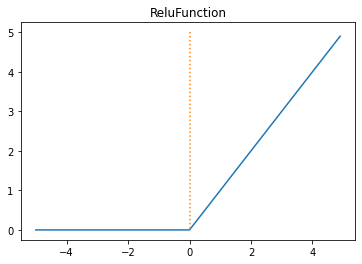

In [ ]:
# 4. ReLU 
def relu(x):
    return np.maximum(0, x) 

x = np.arange(-5.0, 5.0, 0.1) 
y = relu(x) 

plt.plot(x,y) 
plt.plot([0,0], [5.0, 0.0], ':') 
plt.title('ReluFunction') 
plt.show()

In [ ]:
# 5. 리키 렐루(Leaky ReLU) 
a = 0.1 

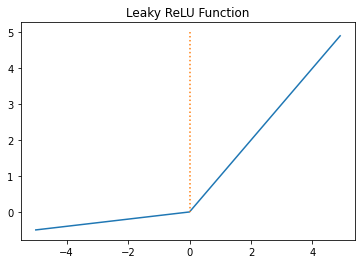

In [ ]:
def leaky_relu(x):
    return np.maximum(a*x, x) 

x = np.arange(-5.0, 5.0, 0.1) 
y = leaky_relu(x) 

plt.plot(x, y) 
plt.plot([0,0], [5.0, 0.0], ':') 
plt.title('Leaky ReLU Function') 
plt.show()

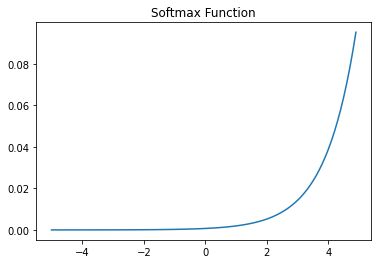

In [ ]:
# 6. Softmax function 
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성 
y = np.exp(x) / np.sum(np.exp(x)) 

plt.plot(x,y) 
plt.title('Softmax Function') 
plt.show()

####**07. 다층 퍼셉트론으로 손글씨 분류하기**

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개 이미지 데이터 로드 

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(digits.target[0])

0


In [ ]:
print('전체 샘플의 수: {}'.format(len(digits.images)))

전체 샘플의 수: 1797


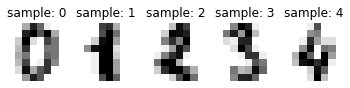

In [ ]:
images_and_labels = list(zip(digits.images, digits.target)) 
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력 
    plt.subplot(2, 5, index + 1) 
    plt.axis('off') 
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    plt.title('sample: %i' % label)

In [ ]:
for i in range(5): 
    print(i, '번 인덱스 샘플의 레이블 :', digits.target[i] )

0 번 인덱스 샘플의 레이블 : 0
1 번 인덱스 샘플의 레이블 : 1
2 번 인덱스 샘플의 레이블 : 2
3 번 인덱스 샘플의 레이블 : 3
4 번 인덱스 샘플의 레이블 : 4


In [ ]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data # 이미지. 즉 특성 행렬 
Y = digits.target # 각 이미지에 대한 레이블 

In [ ]:
# 2. 다층 퍼셉트론 분류기 만들기 
import torch 
import torch.nn as nn 
from torch import optim 

In [ ]:
model = nn.Sequential(
    nn.Linear(64,32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(), 
    nn.Linear(32, 16), # hidden_layer2 = 32, hiddne_layer3= 16 
    nn.ReLU(), 
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer=10 
)

In [ ]:
X = torch.tensor(X, dtype=torch.float32) 
Y = torch.tensor(Y, dtype=torch.int64)

In [ ]:
loss_fn = nn.CrossEntropyLoss() # 이 비용함수는 소프트맥스 함수를 포함하고 있음. 

In [ ]:
optimizer = optim.Adam(model.parameters()) 

In [ ]:
losses = []

In [ ]:
for epoch in range(100): 
    optimizer.zero_grad() 
    y_pred = model(X) # forwar 연산 
    loss = loss_fn(y_pred, Y) 
    loss.backward() 
    optimizer.step() 

    if epoch % 10 == 0: 
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 0.271643
Epoch   10/100 Cost: 0.217505
Epoch   20/100 Cost: 0.181575
Epoch   30/100 Cost: 0.155529
Epoch   40/100 Cost: 0.135846
Epoch   50/100 Cost: 0.120314
Epoch   60/100 Cost: 0.107502
Epoch   70/100 Cost: 0.096702
Epoch   80/100 Cost: 0.087447
Epoch   90/100 Cost: 0.079423


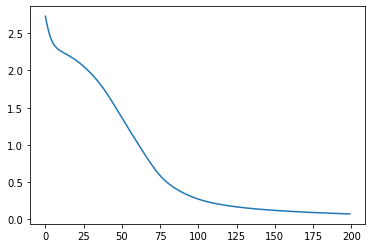

In [ ]:
plt.plot(losses)

####**08. 다층퍼셉트론으로 MNIST 분류하기**

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
print(mnist.data[0])

KeyError: ignored

In [ ]:
mnist.target[0]

'5'

In [ ]:
mnist.target = mnist.target.astype(np.int8)

In [ ]:
X = mnist.data / 255 #0-255 값을 [0,1] 구간으로 정규화
y = mnist.target

In [ ]:
X[0]

KeyError: ignored

In [ ]:
y[0]

5

In [ ]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print('이 이미지 데이터 레이블은 {:.0f}이다'.format(y[0]))

KeyError: ignored

####**09.과적합(Overfitting)막는 방법들**

In [ ]:
# 2. 모델의 복잡도 줄이기 
class Architecturel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): 
        super(Architecturel, self).__init__() 
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() 
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.relu = nnReLU() 
        self.fc3 = nn.Linear(hidden_size, num_classes) 

    def forward(self, x): 
        out = self.fc1(x) 
        out = self.relu(out) 
        out = self.fc2(out) 
        out = self.relu(out) 
        out = self.fc3(out) 
        return out 

In [ ]:
class Architecturel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Architecturel, self).__init__() 
        self.fc1=nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() 
        self.fc2 = nn.Linear(hidden_size, num_classes) 

    def forward(self, x): 
        out = self.fc1(x) 
        out = self.relut(out) 
        out = self.fc2(out) 
        return out 

In [ ]:
model = Architecturel(10, 20, 2) 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

####**02.CNN으로 MNIST 분류하기**

In [ ]:
# 2. 모델 구현하기 
import torch
import torch.nn as nn 

In [ ]:
# 배치 크기 x 채널 x 높이(height) x 너비(width)의 크기의 텐서를 선언
inputs = torch.Tensor(1,1,28,28) 
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


In [ ]:
conv1 = nn.Conv2d(1, 32, 3, padding=1)
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [ ]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [ ]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [ ]:
out = pool(out) 
print(out.shape)

torch.Size([1, 64, 7, 7])


In [ ]:
out.size(0)

1

In [ ]:
out.size(1)

64

In [ ]:
out.size(2)

7

In [ ]:
out.size(3)

7

In [ ]:
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라 
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 3136])


In [ ]:
fc = nn.Linear(3136, 10) # input_dim = 3136, output_dim = 10 
out =fc(out)
print(out.shape)

torch.Size([1, 10])


####**3. CNN으로 MNIST 분류하기**

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms 
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정 
if device == 'cuda': 
    torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', #다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드 
                          transform=transforms.ToTensor(), #텐서로 변환
                          download=True) 

mnist_test = dsets.MNIST(root='MNIST_data/', #다운로드 경로 지정
                         train=False, #False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), #텐서로 변환 
                         download=True) 

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__() 
        # 첫번째 층 
        # ImgIn shape=(?, 28, 28, 1)
        #   Conv -> (?, 28, 28, 32)
        #   Pool -> (?, 14, 14, 32) 
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)) 
        
        # 두번째 층 
        # ImgIn shape=(?, 14, 14, 32)
        # Conv -> (?, 14, 14, 64) 
        # Pool -> (?, 7, 7, 64) 
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # 전결합층 7x7x64 inputs -> 10 outputs 
        self.fc = torch.nn.Linear(7*7*64, 10, bias=True) 

        # 전결합층 한정으로 가중치 초기화 
        torch.nn.init.xavier_uniform_(self.fc.weight) 

    def forward(self, x):
        out = self.layer1(x) 
        out = self.layer2(out) 
        out = out.view(out.size(0), -1) # 전결합층을 위해서 Flatten 
        out = self.fc(out) 
        return out 

In [ ]:
# CNN 모델 정의 
model = CNN().to(device) 

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device) # 비용 함수에 소프트맥스 함수 포함되어져 있음 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader) 
print('총 배치의 수: {}'.format(total_batch))

총 배치의 수: 600


In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: #미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블 
        # image is already size of (28x28), no reshape 
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device) 

        optimizer.zero_grad() 
        hypothesis = model(X) 
        cost = criterion(hypothesis, Y) 
        cost.backward() 
        optimizer.step() 

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch +1, avg_cost)) 

[Epoch:    1] cost = 0.225254163
[Epoch:    2] cost = 0.0599205866
[Epoch:    3] cost = 0.0436833389
[Epoch:    4] cost = 0.0366153829
[Epoch:    5] cost = 0.0301166065
[Epoch:    6] cost = 0.0258374438
[Epoch:    7] cost = 0.0208862461
[Epoch:    8] cost = 0.0180696119
[Epoch:    9] cost = 0.0147405583
[Epoch:   10] cost = 0.0131593337
[Epoch:   11] cost = 0.0109078512
[Epoch:   12] cost = 0.0100085605
[Epoch:   13] cost = 0.00819577556
[Epoch:   14] cost = 0.00646844227
[Epoch:   15] cost = 0.00632963609


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad() 
with torch.no_grad(): 
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device) 
    Y_test = mnist_test.test_labels.to(device) 

    prediction = model(X_test) 
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9871999621391296


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


####**03. 깊은 CNN으로 MNIST 분류하기**

In [ ]:
# 2. 깊은 CNN으로 MNIST 분류하기 
import torch
import torchvision.datasets as dsets 
import torchvision.transforms as transforms
import torch.nn.init 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

# 랜덤 시드 고정 
torch.manual_seed(777) 

# GPU 사용 가능일 경우 랜덤 시드 고정 
if device == 'cuda': 
    torch.cuda.manual_seed_all(777) 

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100 

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정 
                          train=True, #True를 지정하면 훈련 데이터로 다운로드 
                          transform=transforms.ToTensor(), #텐서로 변환
                          download=True) 

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download = True) 

In [ ]:
data_loader =torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

In [ ]:
class CNN(torch.nn.Module): 

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        # Conv -> (?, 28, 28, 32)
        # Pool -> (?, 14, 14, 32) 
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32) 
        # Conv -> (?, 14,14,64)
        # Pool -> (?, 7, 7, 64) 
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=1, padding=1), 
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # L3 ImgIn shape=(?, 7, 7, 64) 
        # Conv -> (?, 7, 7, 128) 
        # Pool -> (?, 4, 4,  128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        )

        # L4 FC 4x4x128 inputs -> 625 outputs 
        self.fc1 = torch.nn.Linear(4*4*128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob)
        )
        # L5 Final FC 625 inputs -> 10 outputs 
        self.fc2 = torch.nn.Linear(625, 10, bias=True) 
        torch.nn.init.xavier_uniform_(self.fc2.weight) 

    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out) 
        out = self.layer3(out) 
        out = out.view(out.size(0), -1) #Flatten them for FC
        out = self.layer4(out) 
        out = self.fc2(out)
        return out 

In [ ]:
# CNN 모델 정의 
model = CNN().to(device) 

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device) # 비용 함수에 소프트맥수 함수 포함되어져 있음 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [ ]:
total_batch = len(data_loader)
print('총 배치의 수: {}'.format(total_batch))

총 배치의 수: 600


In [ ]:
for epoch in range(training_epochs): 
    avg_cost = 0 

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블 
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device) 
        Y = Y.to(device) 

        optimizer.zero_grad() 
        hypothesis = model(X) 
        cost = criterion(hypothesis, Y) 
        cost.backward() 
        optimizer.step() 

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch +1, avg_cost)) 

[Epoch:    1] cost = 0.192275256
[Epoch:    2] cost = 0.0507461615
[Epoch:    3] cost = 0.0365138389
[Epoch:    4] cost = 0.0306382105
[Epoch:    5] cost = 0.0253912453
[Epoch:    6] cost = 0.022565065
[Epoch:    7] cost = 0.0180198587
[Epoch:    8] cost = 0.0149448132
[Epoch:    9] cost = 0.0136389593
[Epoch:   10] cost = 0.0122815594
[Epoch:   11] cost = 0.0125936382
[Epoch:   12] cost = 0.0105269235
[Epoch:   13] cost = 0.0106392689
[Epoch:   14] cost = 0.00846891198
[Epoch:   15] cost = 0.00759851513


In [ ]:
# 학습을 진행하지 않을 것이므로 torch.no_grad() 
with torch.no_grad(): 
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device) 
    Y_test = mnist_test.test_labels.to(device) 

    prediction = model(X_test) 
    correct_prediction = torch.argmax(prediction, 1) == Y_test 
    accuracy = correct_prediction.float().mean() 
    print('Accuracy:', accuracy.item())

Accuracy: 0.9434999823570251


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
